In [110]:
import requests
from bs4 import BeautifulSoup as BS
from datetime import datetime
import pandas as pd
from tqdm import tqdm
from scrape import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
df = pd.read_csv("telex.csv")

In [112]:
df['category'] = df["href"].apply(lambda x: x.split('/')[1])

def f(x):
    try:
        return pd.to_datetime(x).date()
    except:
        return

df["ndate"] = df["date"].apply(f)


In [113]:
df.groupby("category").count()["language"].sort_values(ascending=False)

category
belfold                   13340
kulfold                    9408
sport                      4170
koronavirus                3999
gazdasag                   3195
kult                       1541
szorakozas                 1532
zacc                       1298
tudomany                   1210
tech                        978
eszkombajn                  721
valasztas-2022              663
video                       363
foto                        177
pr-cikk                     166
gasztro                     148
napirajz                    138
tamogatott-tartalom         128
velemeny                    124
szepkilatas                  94
telextarcak                  92
holdblog                     76
eletmod                      71
komplex                      59
nevertek                     57
direkt36                     54
ellenorzo                    46
interju                      32
kozelet                      22
chart                        11
defacto                       9

In [114]:
df.groupby("author").count()["language"].sort_values(ascending=False).head(50)

author
Pál Tamás               2312
Iván-Nagy Szilvia       2249
Ághassi Attila          1754
Koroknai Gergely        1528
Bozzay Balázs           1444
Fehér János             1356
Tenczer Gábor           1295
Világi Máté             1255
Cseke Balázs            1254
Brückner Gergely        1211
Molnár Réka             1198
Barnóczki Brigitta      1097
Presinszky Judit        1070
Csatári Flóra Dóra      1054
Előd Fruzsina           1042
Szalma Baksi Ferenc     1032
Flachner Balázs         1007
Mizsur András            947
Bakró-Nagy Ferenc        944
Nyilas Gergely           935
Sajó Dávid               867
Klág Dávid               863
Joób Sándor              826
Német Tamás              776
Haász János              724
Körömi Csongor           716
Biró Marianna            700
Bozsó Ágnes              620
Thüringer Barbara        590
Hanula Zsolt             589
Bolcsó Dániel            588
Pintér Luca              582
Fábián Tamás             543
Kolozsi Ádám             481
Marjano

<AxesSubplot:xlabel='ndate'>

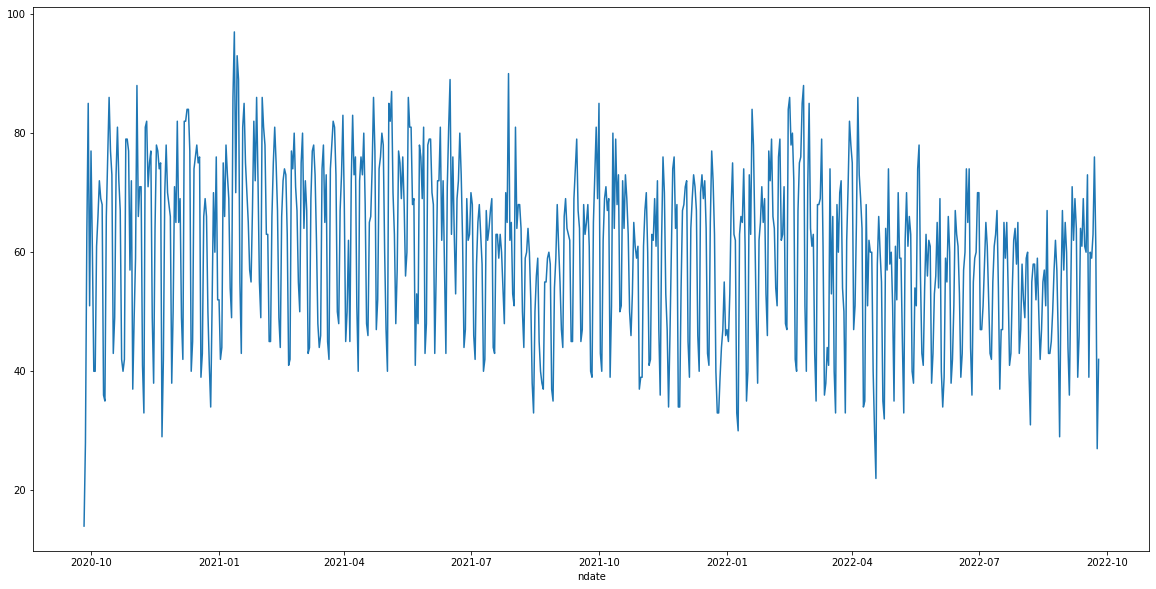

In [118]:
# number of articles per day through time
fig, ax = plt.subplots(1,1, figsize=(20,10))
df.groupby("ndate").count()["href"].plot(ax=ax)

In [117]:
#average number of articles per day
df.groupby("ndate").count().mean()["href"]

60.176712328767124